<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Estudiantes:</b></i> Alejandro Sánchez, Nahum Bello, Camilo Martinez, Juan Pena
<br>
<i><b>Tema:</b></i> Taller Hackeaton Ideaton
<br>
<i><b>Fecha:</b></i> 2/11/2022
<br>
</FONT>
</div>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [ ]:
!git clone https://github.com/AlejandroSanchez01/Hackaton_Reor.git

fatal: destination path 'Hackaton_Reor' already exists and is not an empty directory.


## Dataset
En este caso el entrenamiento solamente se va a entrenar con dos imagenes debido que es una muestra. 

In [ ]:
# Cargar imagen
image = Image.open('Hackaton_Reor/Imagenes/f50d8233-97ab-432e-8b2c-41371301545f.jpg')
image = image.resize((295,428 ))
# convertir imagen en numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(428, 295, 3)


In [ ]:
# cargar imagen
image = Image.open('Hackaton_Reor/Imagenes/698b262a-38d4-4538-9276-46eef05e5a14.jpg')
image = image.resize((295,428 ))
# convertir imagen en numpy array
data1 = asarray(image)
print(type(data1))
# summarize shape
print(data1.shape)

<class 'numpy.ndarray'>
(428, 295, 3)


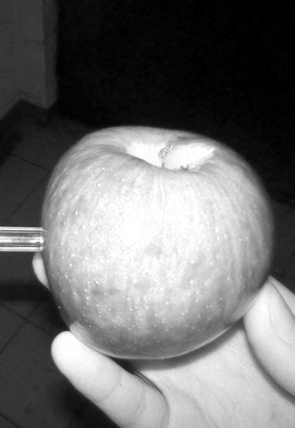

In [ ]:
manzana = Image.fromarray(data[:,:,0])
manzana

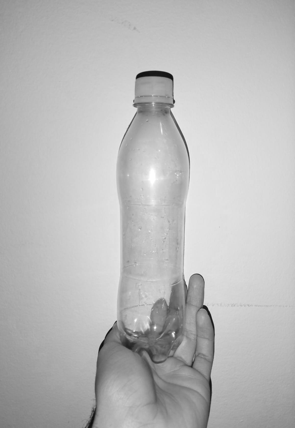

In [ ]:
botella = Image.fromarray(data1[:,:,0])
botella

##Pre-processing del set de datos
El set de datos debe ser pre-procesado antes de entrenar al modelo. Si se inspecciona alguna de las imagenes del set de entrenamiento, se puede evidenciar de que los valores de los píxeles están entre 0 y 255:

In [ ]:
productos = []
manzana = data[:,:,0]
botella = data1[:,:,0]
productos.append(manzana)
productos.append(botella)

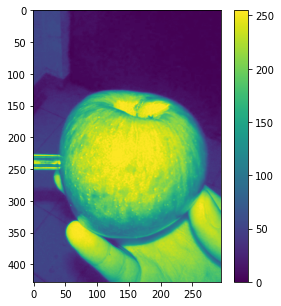

In [ ]:
plt.figure(figsize=(5,5)) #Crea una figura
plt.imshow(manzana)# muestra un input en formato RGB
plt.colorbar() #Barrita lateral
plt.grid(False)#No dibujes gradilla 
plt.show() #Muestra

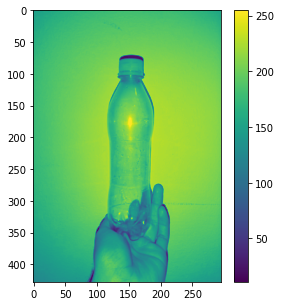

In [ ]:
plt.figure(figsize=(5,5)) #Crea una figura
plt.imshow(botella)# muestra un input en formato RGB
plt.colorbar() #Barrita lateral
plt.grid(False)#No dibujes gradilla 
plt.show() #Muestra

Ese rango de 0 a 255 sale de la misma representación de los colores RGB, ya que cada color es representado por una cadena de 8 bits (RRGGBB), donde se tienen 2 bits para representar atributos de rojo, verde y azul individualmente, 28=250 contando el 0 tenemos de 0 a 255. Por ejemplo el color negro sería #000000.

Pero aún falta hacer algo más, es necesario normalizar el vector para que solo tome valores entre 0 y 1. Así que reasignan las variables dividiendolas entre el valor más alto que pueden tomar, que en este caso es 255.

In [ ]:
train_images = np.array([i/255.0 for i in productos])
train_labels = np.array([0,1])

In [ ]:
# load the image
image = Image.open('Hackaton_Reor/Imagenes/640px-Kirkland_Signature_Drinking_Water_1.5L_20050508.jpg')
image = image.resize((295,428 ))
# convert image to numpy array
data2 = asarray(image)
print(type(data2))
# summarize shape
print(data2.shape)

<class 'numpy.ndarray'>
(428, 295, 3)


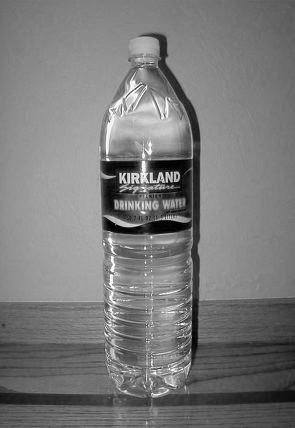

In [ ]:
Image.fromarray(data2[:,:,0])

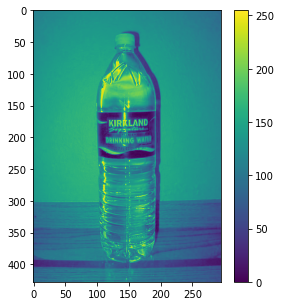

In [ ]:
plt.figure(figsize=(5,5)) #Crea una figura
plt.imshow(data2[:,:,0])# muestra un input en formato RGB
plt.colorbar() #Barrita lateral
plt.grid(False)#No dibujes gradilla 
plt.show() #Muestra

In [ ]:
test_images = np.array([data2[:,:,0]/255.0])
test_labels = np.array([1])

In [ ]:
#class_names = ["Manzana","Botella"]
class_names = ["Caneca_verde","Caneca_azul"]

Para verificar que los datos se encuentran el formato correcto y que están listos para entrenar al modelo, se muestran las imágenes del dataset de entrenamiento acompañado de la clase que tienen asociada cada una.

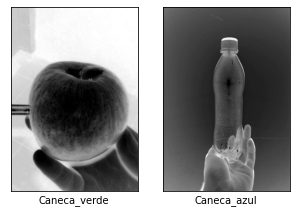

In [ ]:
%matplotlib inline

plt.figure(figsize=(5,5))
for i in range(2):
    # Subplot ayuda a mostrar varías visualizaciones
    plt.subplot(1,2, i+1) #Crea una figurita en 1 filas x 2 columnas desde el elemento 1
    plt.xticks([]) #Espacios o posicionamientos en x
    plt.yticks([]) #Posicionamiento en y
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##Creando el modelo
Para crear la red neuronal se requiere configurar las capas del modelo y después, compilar el modelo.

##Configurando capas
El bloque fundamental al crear la red neuronal son las capas. Estas capas extraen representaciones de los datos que se han introducido en ellas. Con suerte, se tienen representaciones significativas para el problema en cuestión.

La mayor parte del Deep Learning consiste en encadenar cadenas simples para poder extraer representaciones más complejas. La mayoría de capas, como tf.keras.layers.Dense, tienen parámetros que se van aprendiendo durante el entrenamiento.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(428,295)),  #"Aplana" el input
    tf.keras.layers.Dense(128, activation='relu'), #Capa conectada que tiene una función de activación relu
    tf.keras.layers.Dense(2) #Capa de 2 unidades (SoftMax)               
])

##Compilando el modelo
Antes de que esté preparado para el entrenamiento, es importante hacerle una serie de configuraciones. En donde se añadiran al paso de compilación donde se tienen:

- Función de pérdida: Esta parte mide que tan bueno es nuestro modelo durante el entrenamiento. Lo que se desea es minimizar la función de pérdida, de manera que "se pueda orientar" al modelo por el camino correcto.

- Optimizador: Esto es cómo el modelo será actualizado basado en los datos que va estudiando y en base a su función de pérdida, en este caso se utiliza el optimizador adam.

- Metrics: Se utiliza para monitorizar los pasos de entrenamiento y de testeo. En el siguiente código se va a utilizar accuracy que indica la fracción de las imágenes que ha sido clasificada correctamente.

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

##Entrenando el modelo
Para entrenar a una red neuronal se requieren de los siguientes pasos:

1. Se ingresan los datos de entrenamiento a nuestro modelo training_images y training_labels.

1. El modelo aprende a asociar las imágenes con sus etiquetas.

1. Se solicita al modelo que haga predicciones, en este caso con el conjunto de datos de testeo de imágenes test_images, por supuesto sin etiquetas ya que eso es lo que se busca predecir.

1. Se verifican las predicciones comparandolas con nuestro conjunto test_labels.

In [ ]:
# 1
model.fit(train_images, train_labels, epochs=10) # Epochs = iteraciones para que tenga mejor accuracy

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.5584 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 172ms/step - loss: 24.0254 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 108ms/step - loss: 4.3612 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 136ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 129ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 153ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 126ms/step - loss: 0.0000e+00 - accuracy: 

In [ ]:
# Se comparan que tan bien hace predicciones
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {round(test_acc,3)}\nTest Loss: {round(test_loss, 3)}')

1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 518ms/epoch - 518ms/step

Test accuracy: 1.0
Test Loss: 0.0


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)
predictions =  predictions.round(4)

1/1 [==============================] - 1s 1s/step


In [ ]:
import pandas as pd
predict_df = pd.DataFrame(predictions)
predict_df

,0,1
0,0.0,1.0


In [ ]:
np.argmax(predictions[0])

1

In [ ]:
class_names[np.argmax(predictions[0])]

'Caneca_azul'

In [ ]:
# Dibuja una imagen, recibe el indice de la imagen, la etiqueta predicha (más bien su vector completo),
# la etiqueta real y el set de imágenes para después tomar la imagen de indice "i".
def plot_image(i, predictions_array, true_label, img):

    # De las etiquetas de test obten la de indice i, lo mismo con las imágenes
    true_label, img = true_label[i], img[i]

    # Estos pasos ya los conocemos
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    # Obtenemos el valor con la probabilidad más alta
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue' # Azul si acertó el modelo
    else: 
        color = 'red'  # Rojo si falló
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], #Primero la etiqueta predicha
                                         100*np.max(predictions_array), # Porcentaje obtenido
                                         class_names[true_label]), # Etiqueta real
                                         color = color) # Color si acertó o falló

In [ ]:

# Dibuja el array, toma el indice, el array de predicciones y la etiqueta correcta
def plot_value_array(i, predictions_array, true_label):

    # Ubica la etiqueta real
    true_label = true_label[i]

    # Desactiva la gradilla y ubica los elementos 
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])

    # Haz una gráfica de barras de 0 a 9 con nuestras predicciones de color gris
    this_plot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim( [0,1] ) # Ya que está normalizado

    # Ubica el valor predicho
    predicted_label = np.argmax(predictions_array)

    # Valor predicho con rojo
    this_plot[predicted_label].set_color('red')
    # Valor real con azul
    this_plot[true_label].set_color('blue')

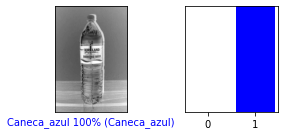

In [ ]:
num_rows = 1
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Referencias

https://github.com/abdielgv163/Machine-Learning-and-DS/blob/master/Redes_neuronales/Clasificador_de_Ropa_TensorFlow.ipynb